In [11]:
#Import essential libraries
import dataTools as dt

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC, SVR
from sklearn import datasets

In [216]:
#Generate Samples
x, y = datasets.make_classification(

    n_samples=50, n_features=2, n_informative=2, n_classes=2, n_redundant=0,

    n_clusters_per_class=2, random_state=123

)

np.c_[y, x]
x1, x2 = x[:,0], x[:,1]

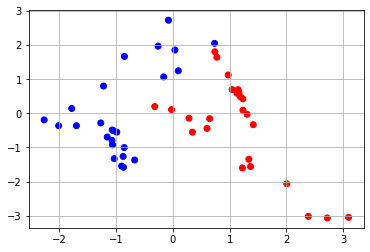

In [217]:
#Visualize
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.grid()
plt.show()

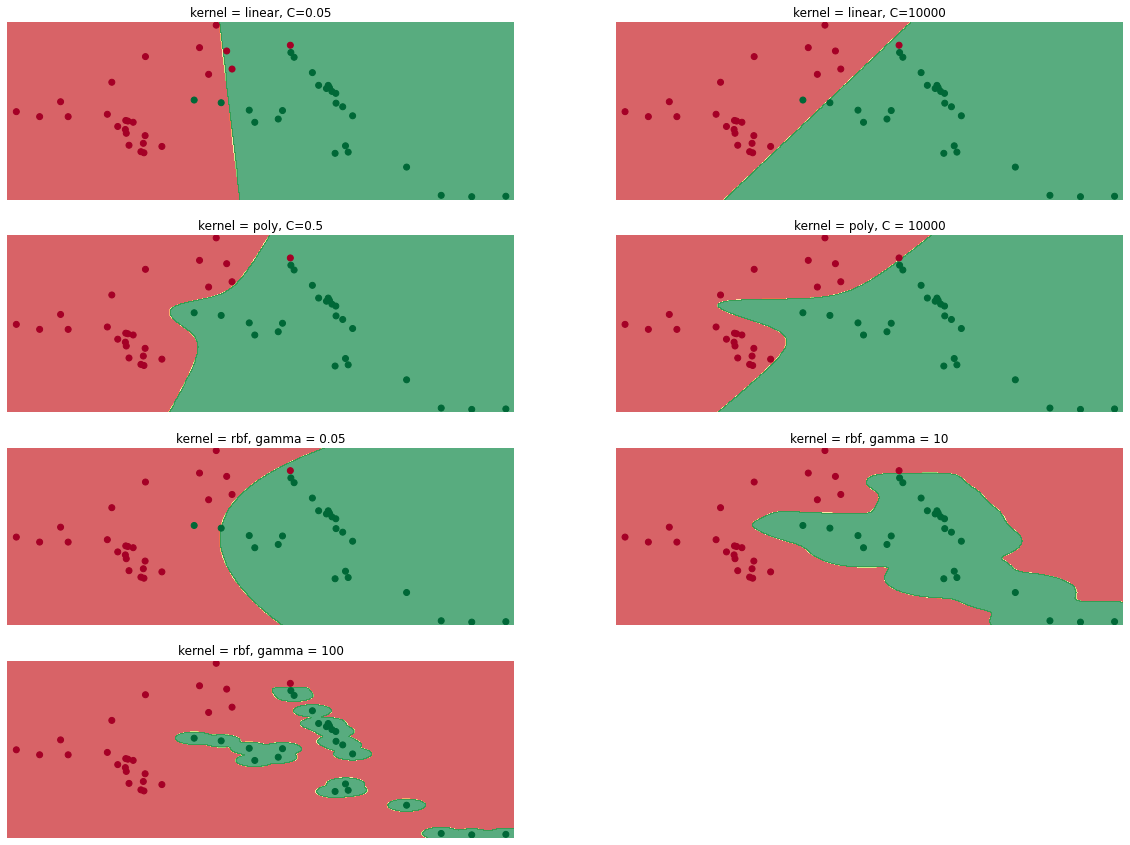

In [241]:
#Tuning SVM Parameters (C, Gamma, Kernel)
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
svm_model = SVC(kernel='linear', C=0.05).fit(x, y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = linear, C=0.05')
plt.axis('off')

plt.subplot(4,2,2)
svm_model = SVC(kernel='linear', C=10000).fit(x,y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = linear, C=10000')
plt.axis('off')

plt.subplot(4,2,3)
svm_model = SVC(kernel = 'poly', C=0.5).fit(x, y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = poly, C=0.5')
plt.axis('off')

plt.subplot(4,2,4)
svm_model = SVC(kernel = 'poly', C=10000).fit(x, y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = poly, C = 10000')
plt.axis('off')

plt.subplot(4,2,5)
svm_model = SVC(kernel = 'rbf', C=1, gamma=0.05).fit(x, y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = rbf, gamma = 0.05')
plt.axis('off')

plt.subplot(4,2,6)
svm_model = SVC(kernel = 'rbf', C=1, gamma=10).fit(x, y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = rbf, gamma = 10')
plt.axis('off')

plt.subplot(4,2,7)
svm_model = SVC(kernel = 'rbf', C=1, gamma=100).fit(x, y)
dt.dimensionchange(svm_model, x1, x2, cmap='RdYlGn', alpha=0.7)
plt.scatter(x1, x2, c=y, cmap='RdYlGn')
plt.title('kernel = rbf, gamma = 100')
plt.axis('off')
plt.show()

> C는 결정경계를 정하는 파라미터 이고,   
  - 오분류를 어느정도 허용할지에 대한 파라미터 
  - C가 너무 작으면 오분류를 허용할 가능성이 높고, 과소적합될 우려가 있습니다. 
  - C가 너무 크면, 오분류를 허용하지 않겠다는 뜻이고, 과적합 될 가능성이 높습니다. 
  
> 감마는 곡률경계를 결정짓는 파라미터이고,   
  - 감마가 작으면 곡률의 범위가 커지게 되고, 과소적합될 우려가 있습니다. 
  - 감마가 크면 곡률의 범위가 작아지게 되고, 자료를 완벽하게 하나하나의 곡률로 분류하게 되면서, 과적합이 발생할 우려가 있습니다. 


In [249]:
#Generate Sample Dataset
np.random.seed(1234)
x_train = np.linspace(0, 1, 80)
y_train = np.sin(1.8 * np.pi * x_train) + (np.random.randn(80)/10)

x_test = np.linspace(0, 1, 20)
y_test = np.sin(1.8 * np.pi * x_test) + (np.random.randn(20)/10)

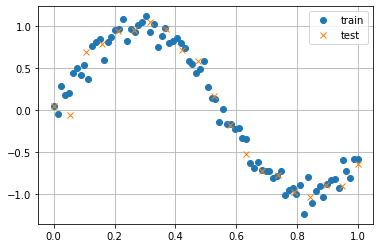

In [256]:
#Visualize data
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.legend()
plt.grid()
plt.show()

In [257]:
# Import SVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

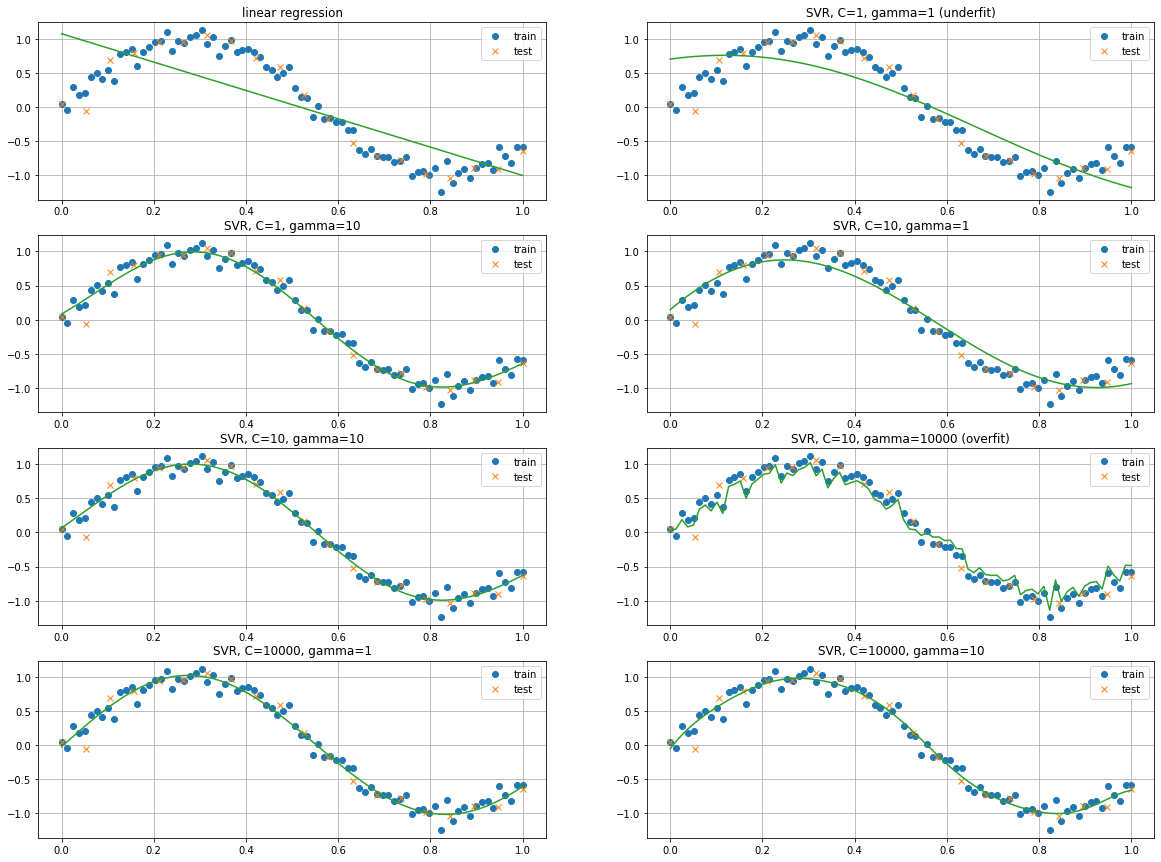

In [280]:
#Tuning SVM parameters for SVR (C, Gamma)
plt.figure(figsize=(20,15))

plt.subplot(4,2,1)
x_train = x_train.reshape(-1,1)
linearModel = LinearRegression().fit(x_train, y_train)
yhat = linearModel.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, linearModel.predict(x_train))
plt.legend()
plt.title('linear regression')
plt.grid()

plt.subplot(4,2,2)
svm_model = SVR(C=1, gamma=1).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=1, gamma=1 (underfit)')
plt.grid()

plt.subplot(4,2,3)
svm_model = SVR(C=1, gamma=10).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=1, gamma=10')
plt.grid()

plt.subplot(4,2,4)
svm_model = SVR(C=10, gamma=1).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=10, gamma=1')
plt.grid()

plt.subplot(4,2,5)
svm_model = SVR(C=10, gamma=10).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=10, gamma=10')
plt.grid()

plt.subplot(4,2,6)
svm_model = SVR(C=10, gamma=10000).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=10, gamma=10000 (overfit)')
plt.grid()

plt.subplot(4,2,7)
svm_model = SVR(C=10000, gamma=1).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=10000, gamma=1')
plt.grid()

plt.subplot(4,2,8)
svm_model = SVR(C=10000, gamma=10).fit(x_train, y_train)
yhat = svm_model.predict(x_train)
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'x', label='test')
plt.plot(x_train, svm_model.predict(x_train))
plt.legend()
plt.title('SVR, C=10000, gamma=10')
plt.grid()